In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras import utils, optimizers, regularizers

Делим наш датасет на обучающую и тестовую выборку

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [3]:
print('train_images: ', train_images.shape)
print('test_images: ', test_images.shape)
print('train_labels: ', train_labels.shape)
print('test_labels: ', test_labels.shape)

train_images:  (50000, 32, 32, 3)
test_images:  (10000, 32, 32, 3)
train_labels:  (50000, 1)
test_labels:  (10000, 1)


Нормализация данных

In [4]:
train_labels = utils.to_categorical(train_labels, 100)
test_labels = utils.to_categorical(test_labels, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

создание модели нейронной сети

In [5]:
dropP = 0.2

model = Sequential()

model.add(Conv2D(128,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.L2(1e-4)))
model.add(Activation('relu'))
model.add(Dropout(dropP))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 128)       0

Компиляция модели

In [6]:
model.compile(optimizer=optimizers.Adadelta(learning_rate=0.15),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [7]:
epochs = 50
batch_size = 64

hist = model.fit(train_images, train_labels, batch_size=batch_size, validation_data=(test_images, test_labels),
                 epochs=epochs)

Epoch 1/50
782/782 [==============================] - 23s 26ms/step - loss: 3.9765 - accuracy: 0.1243 - val_loss: 3.8669 - val_accuracy: 0.1386
Epoch 2/50
782/782 [==============================] - 20s 25ms/step - loss: 3.1866 - accuracy: 0.2515 - val_loss: 3.1154 - val_accuracy: 0.2708
Epoch 3/50
782/782 [==============================] - 20s 25ms/step - loss: 2.7030 - accuracy: 0.3448 - val_loss: 3.7689 - val_accuracy: 0.1995
Epoch 4/50
782/782 [==============================] - 20s 25ms/step - loss: 2.3678 - accuracy: 0.4127 - val_loss: 2.4855 - val_accuracy: 0.3942
Epoch 5/50
782/782 [==============================] - 20s 25ms/step - loss: 2.1295 - accuracy: 0.4657 - val_loss: 2.6593 - val_accuracy: 0.3500
Epoch 6/50
782/782 [==============================] - 20s 25ms/step - loss: 1.9312 - accuracy: 0.5110 - val_loss: 2.0595 - val_accuracy: 0.4779
Epoch 7/50
782/782 [==============================] - 20s 25ms/step - loss: 1.7720 - accuracy: 0.5455 - val_loss: 2.0851 - val_accuracy:

Проверка точности предсказания

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 1.9212 - accuracy: 0.6073


Графики

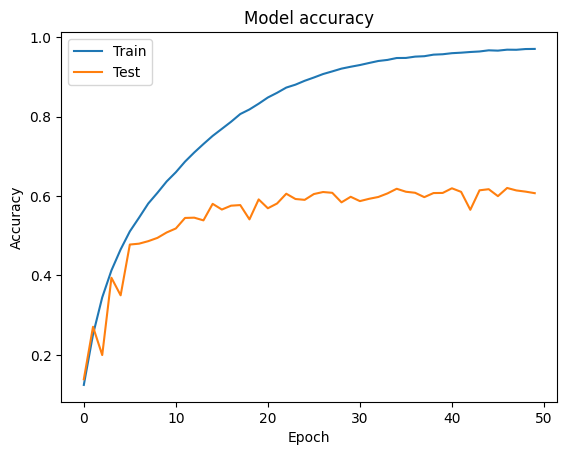

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

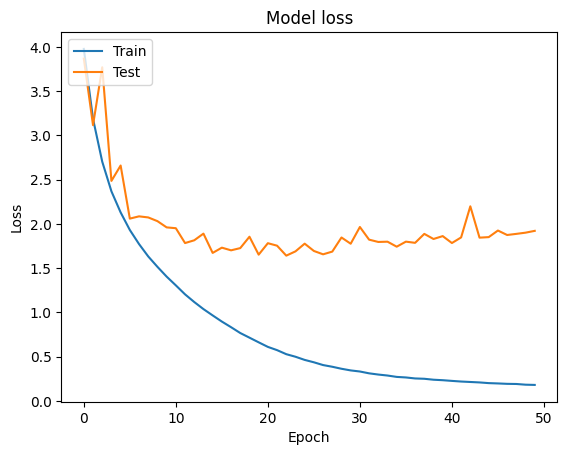

None


In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
print(plt.show())